In [84]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, filters, morphology as mo
from skimage.color import rgb2gray
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from scipy.ndimage import prewitt, laplace, mean, median_filter
import cv2 as cv

import pandas as pd

In [85]:
image_path = 'data/original/10.pgm'
image_groundtruth_path = 'data/groundtruth/10_gt.pgm'
image = plt.imread(image_path)
image_groundtruth = plt.imread(image_groundtruth_path)
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

## Pre procesamiento

### Imagen Original

(-0.5, 299.5, 299.5, -0.5)

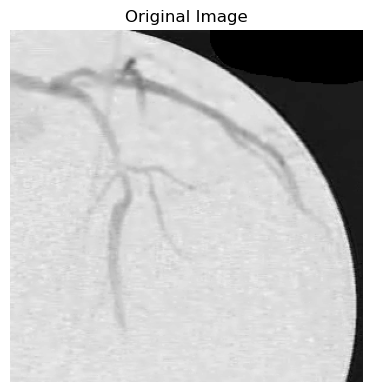

In [86]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

### Pre-Procesamiento de la Bmagen

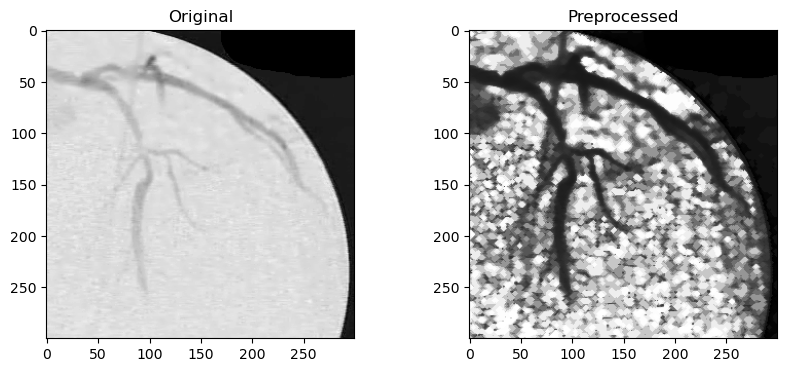

In [87]:
hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 255])

# Aplicar erosión y dilatación
erosion = mo.erosion(image, mo.disk(2))
dilatation = mo.dilation(erosion, mo.disk(2))

# Ecualizar la imagen
equalized = exposure.equalize_hist(dilatation)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title('Preprocessed')
plt.show()

## Niblack

In [88]:
def niblack_thresholding(image, window_size=15, k=-0.2):
    x, y = image.shape
    threshold = np.zeros((x, y), dtype=np.uint8)
    
    for i in range(x):
        for j in range(y):
            x1 = max(0, i - window_size // 2)
            x2 = min(x, i + window_size // 2)
            y1 = max(0, j - window_size // 2)
            y2 = min(y, j + window_size // 2)
            
            window = image[x1:x2, y1:y2]
            mean = np.mean(window)
            std = np.std(window)
            
            threshold[i, j] = mean - k * std
            
    return threshold

In [89]:
threshold = niblack_thresholding(image, window_size=21, k=0.2)
binary = image < threshold

In [90]:
def binarize_arteries(image):
    I = image
    
    # Eliminar ruido con filtro de mediana
    I = median_filter(I, size=1)
    
    # Aplicar filtro gausiano para suavizar la imagen
    I = filters.gaussian(I, sigma=2)
    
    # Aplicar filtro de Laplace para detectar bordes
    I = laplace(I)
    # Aplicar umbralización de Otsu
    # threshold = filters.threshold_otsu(I)
    # I = I > threshold
    
    # Aplicar operaciones morfológicas para mejorar los bordes
    # SP = morphology.disk(1)
    # I = morphology.erosion(I, SP)  # Hacer los bordes más finos
    
    # SP = mo.disk(2)
    # I = morphology.dilation(I, SP)  # Hacer los bordes más gruesos
    
    threshold = niblack_thresholding(image, window_size=21, k=0.2)
    I = image < threshold
    
    return I

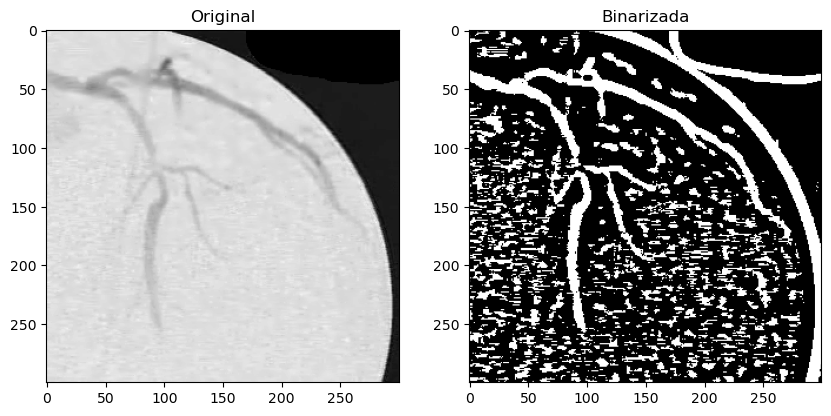

In [91]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Binarizada')
plt.imshow(binary, cmap='gray')
plt.show()

## Resultados 

Image 1:
Accuracy: 0.7620
Recall: 0.9262
Precision: 0.1421
F1 Score: 0.2464
Specificity: 0.7548
-------------------------


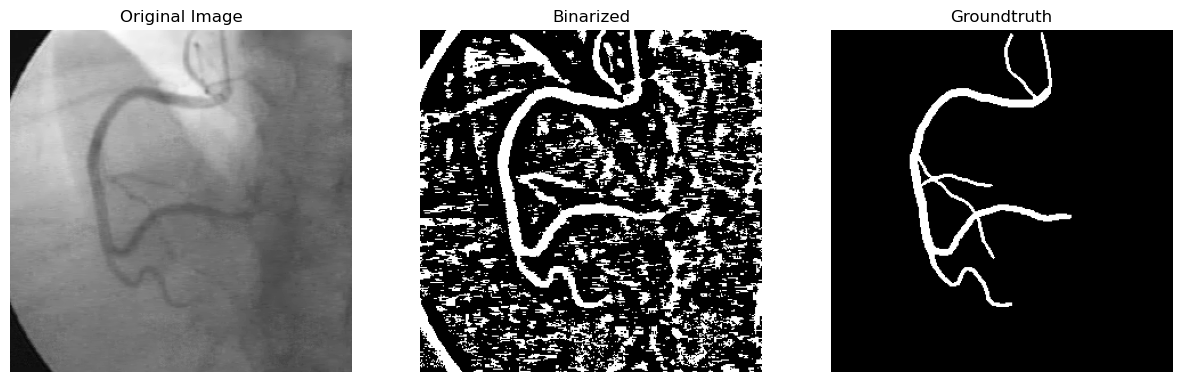

Image 2:
Accuracy: 0.8017
Recall: 0.9395
Precision: 0.1849
F1 Score: 0.3090
Specificity: 0.7949
-------------------------


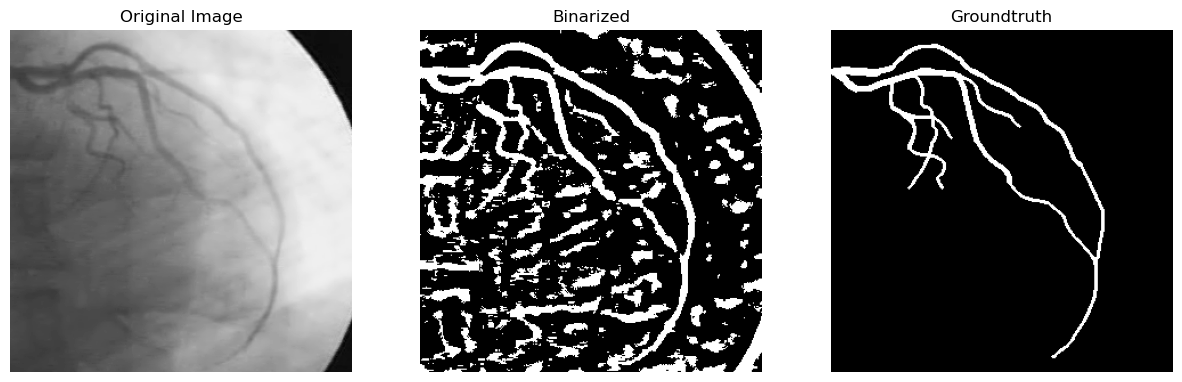

Image 3:
Accuracy: 0.7953
Recall: 0.9363
Precision: 0.1624
F1 Score: 0.2768
Specificity: 0.7891
-------------------------


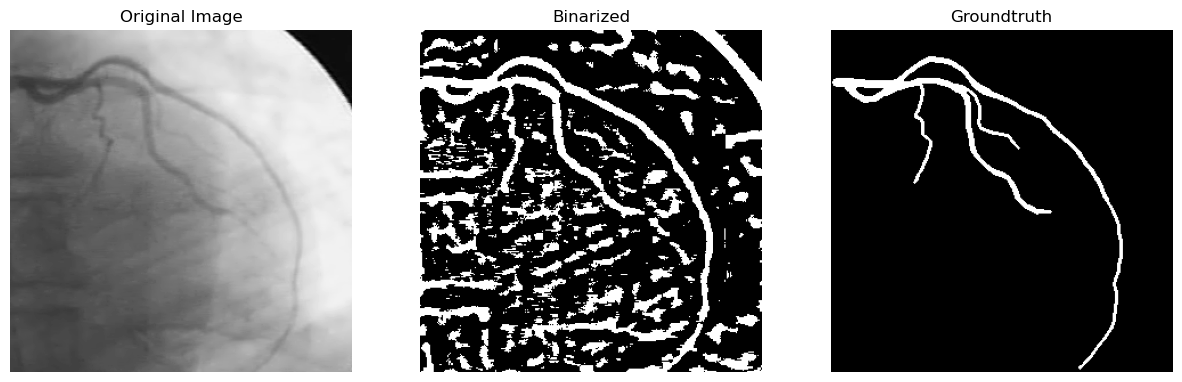

Image 4:
Accuracy: 0.8021
Recall: 0.8833
Precision: 0.1684
F1 Score: 0.2829
Specificity: 0.7984
-------------------------


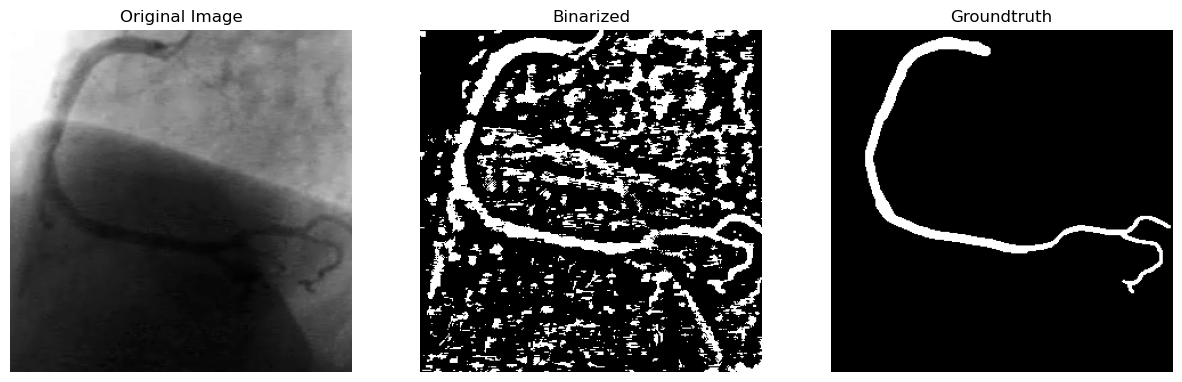

Image 5:
Accuracy: 0.7734
Recall: 0.9469
Precision: 0.1322
F1 Score: 0.2321
Specificity: 0.7669
-------------------------


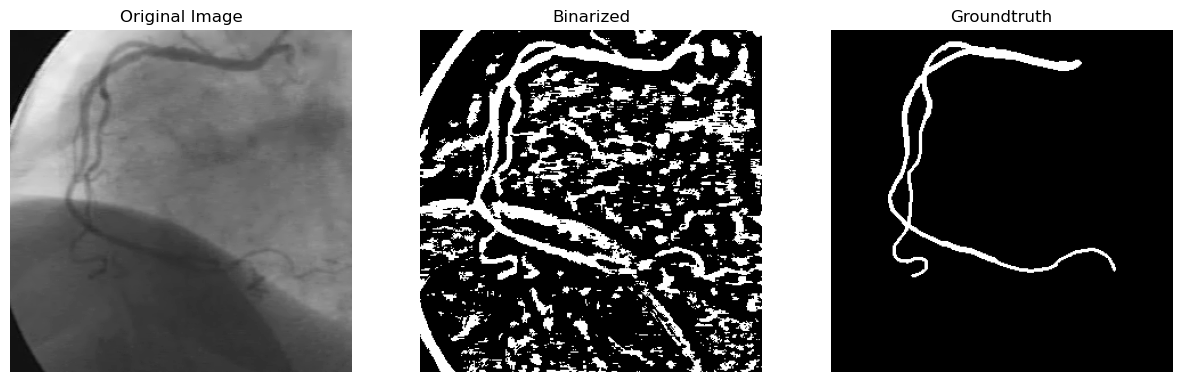

Image 6:
Accuracy: 0.7698
Recall: 0.9427
Precision: 0.1309
F1 Score: 0.2300
Specificity: 0.7632
-------------------------


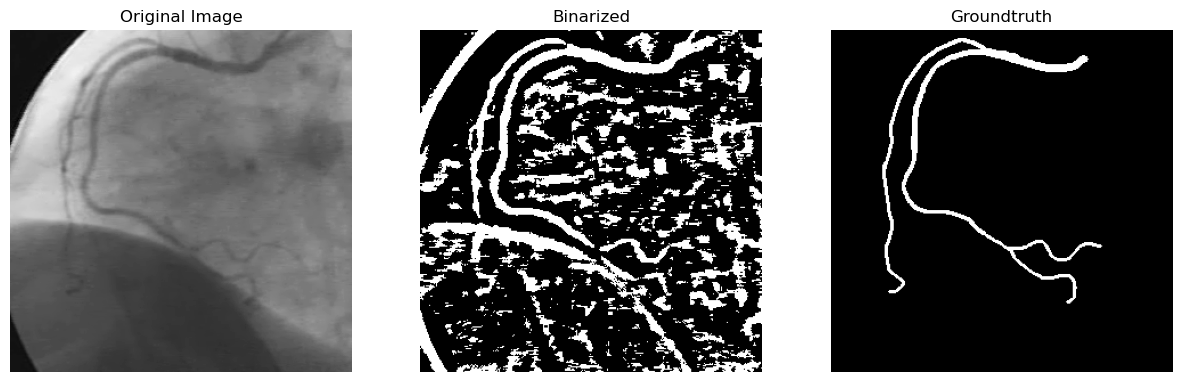

Image 7:
Accuracy: 0.7698
Recall: 0.9418
Precision: 0.1693
F1 Score: 0.2871
Specificity: 0.7609
-------------------------


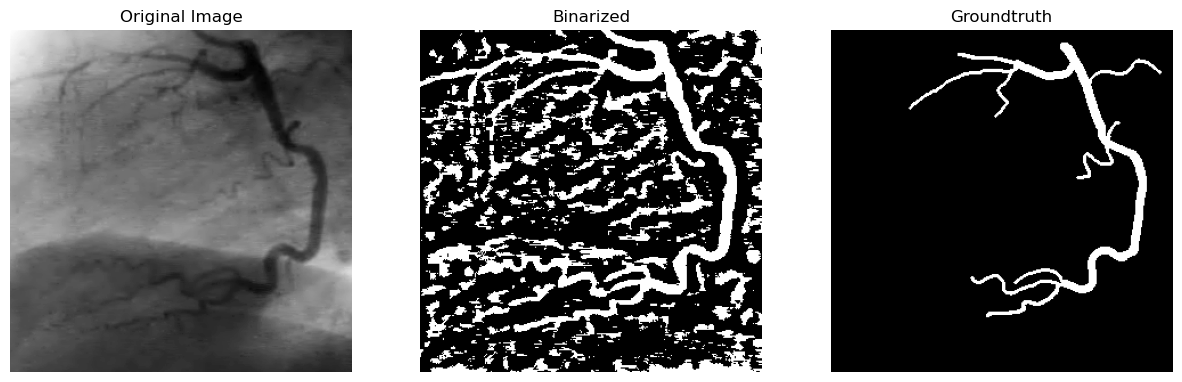

Image 8:
Accuracy: 0.7797
Recall: 0.8905
Precision: 0.1618
F1 Score: 0.2739
Specificity: 0.7743
-------------------------


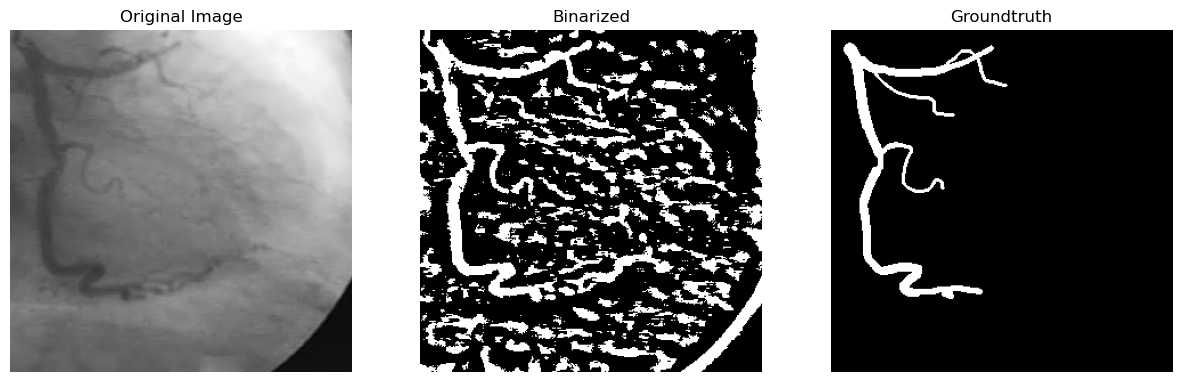

Image 9:
Accuracy: 0.7707
Recall: 0.9354
Precision: 0.1741
F1 Score: 0.2935
Specificity: 0.7619
-------------------------


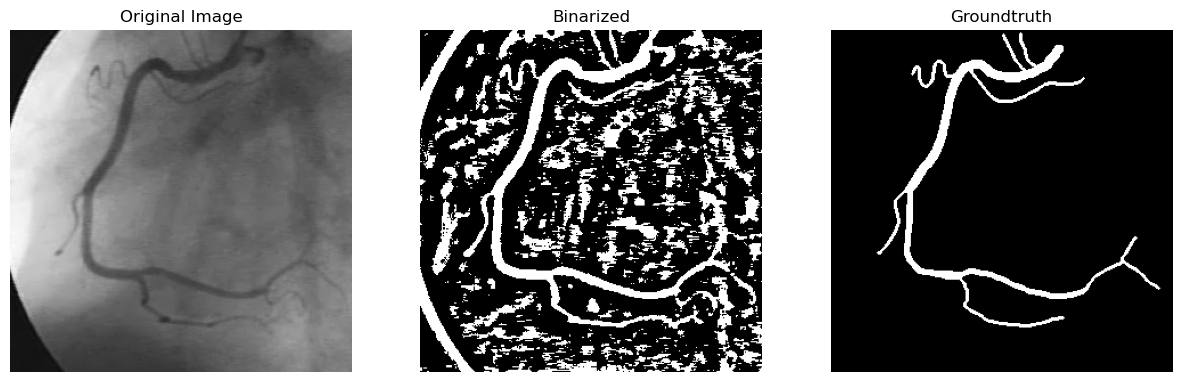

Image 10:
Accuracy: 0.7877
Recall: 0.8977
Precision: 0.1593
F1 Score: 0.2706
Specificity: 0.7827
-------------------------


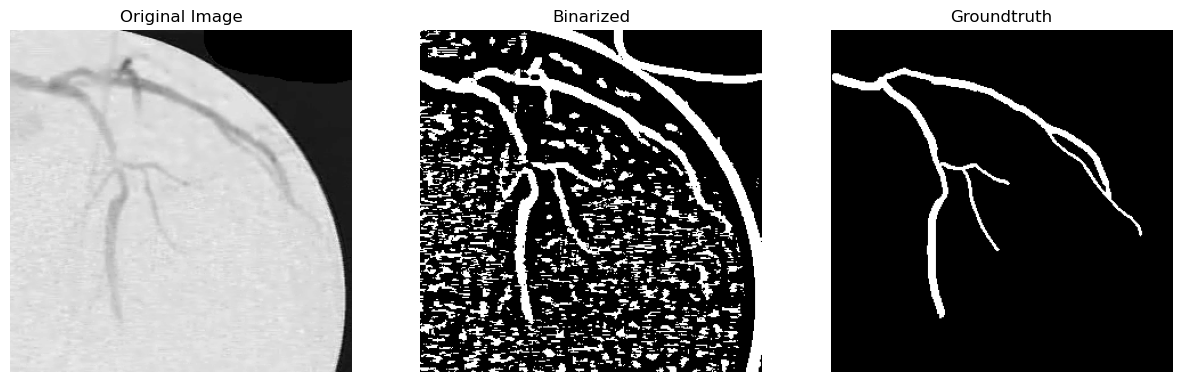

Image 11:
Accuracy: 0.7750
Recall: 0.9069
Precision: 0.1429
F1 Score: 0.2469
Specificity: 0.7694
-------------------------


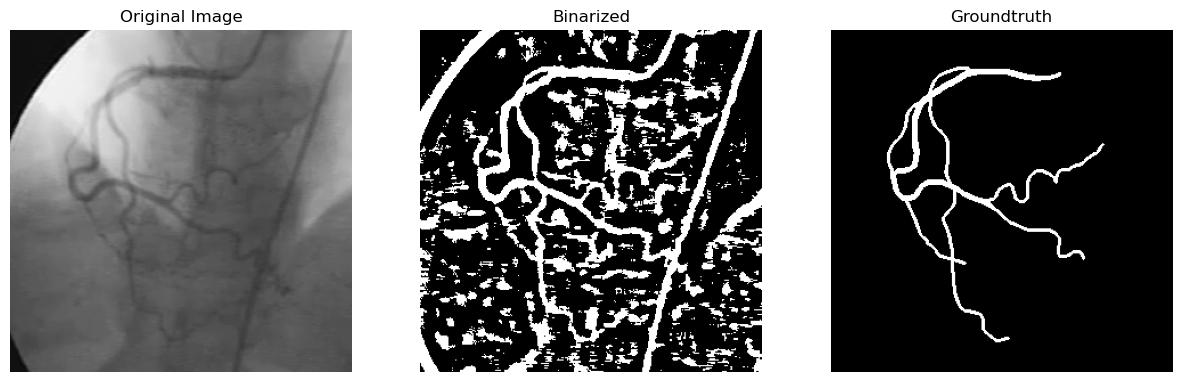

Image 12:
Accuracy: 0.7949
Recall: 0.9037
Precision: 0.2662
F1 Score: 0.4112
Specificity: 0.7855
-------------------------


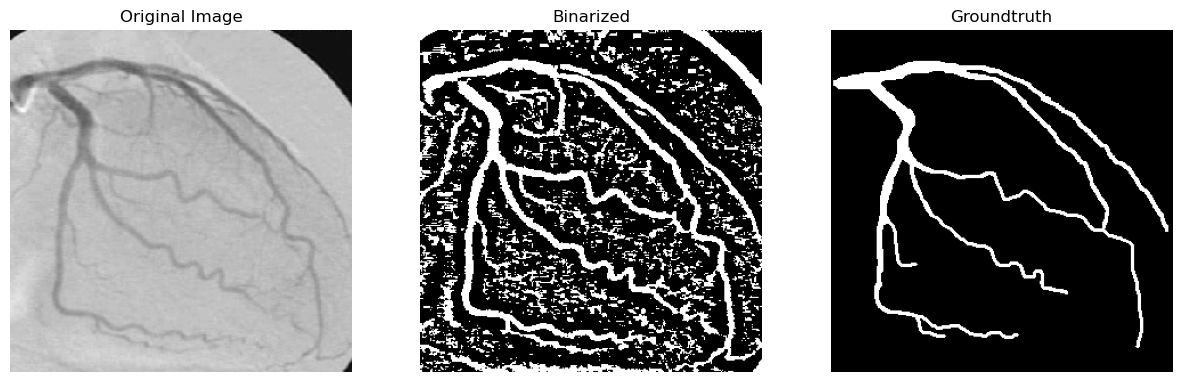

Image 13:
Accuracy: 0.7621
Recall: 0.9304
Precision: 0.1360
F1 Score: 0.2373
Specificity: 0.7551
-------------------------


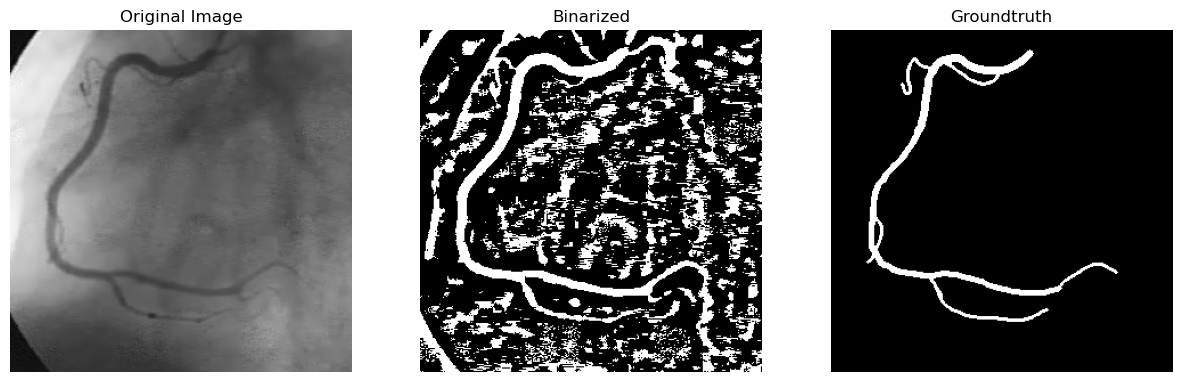

Image 14:
Accuracy: 0.7983
Recall: 0.8697
Precision: 0.2446
F1 Score: 0.3818
Specificity: 0.7928
-------------------------


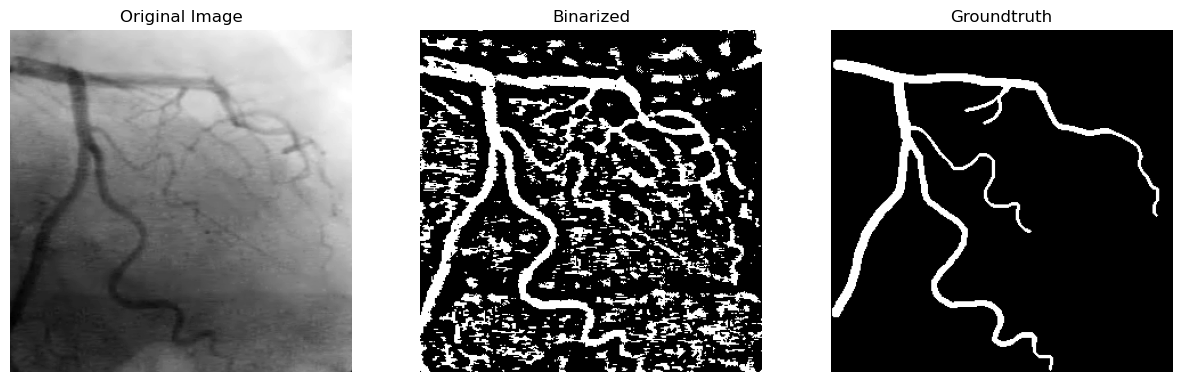

Image 15:
Accuracy: 0.8132
Recall: 0.9309
Precision: 0.1994
F1 Score: 0.3285
Specificity: 0.8071
-------------------------


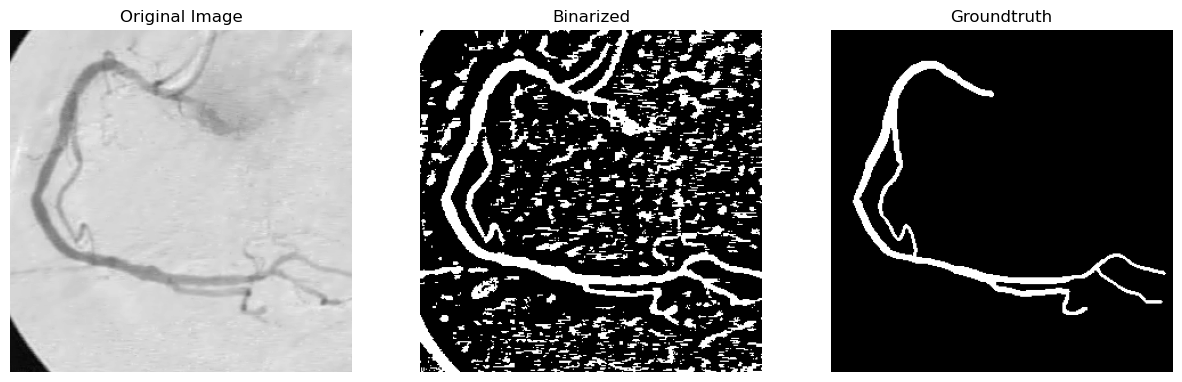

Image 16:
Accuracy: 0.7456
Recall: 0.9282
Precision: 0.1700
F1 Score: 0.2874
Specificity: 0.7350
-------------------------


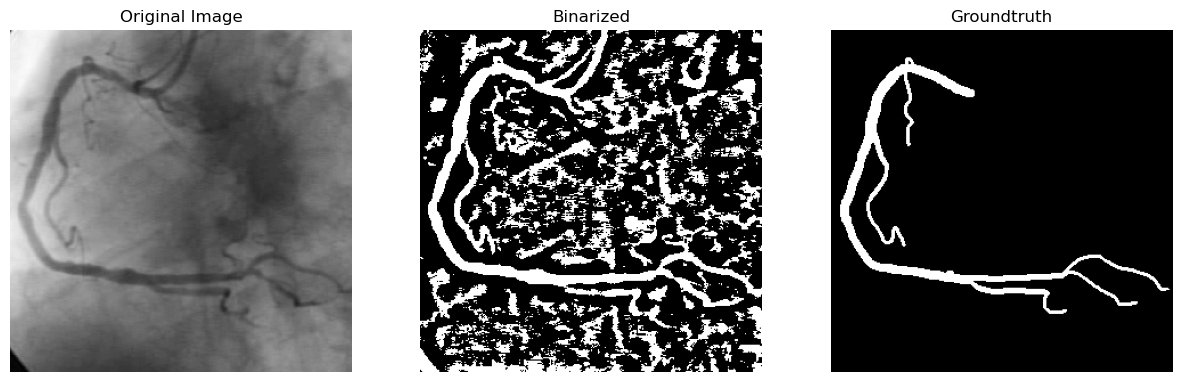

Image 17:
Accuracy: 0.8551
Recall: 0.9080
Precision: 0.2361
F1 Score: 0.3747
Specificity: 0.8524
-------------------------


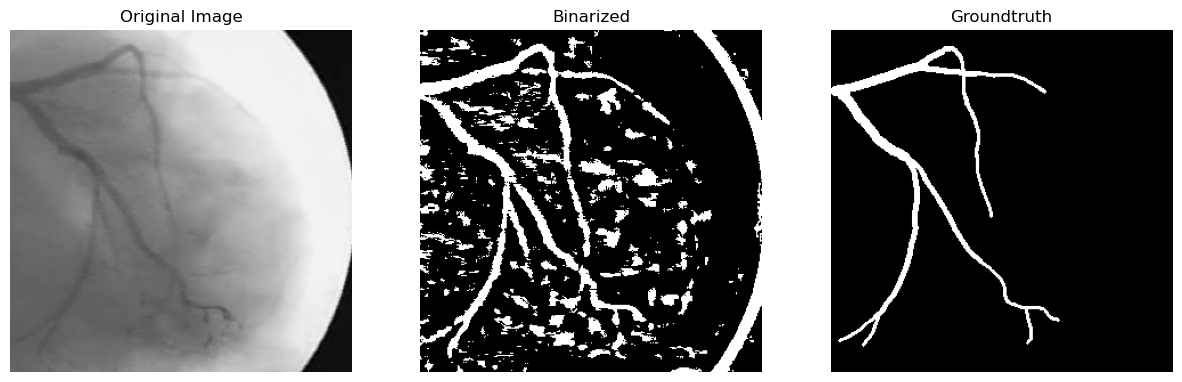

Image 18:
Accuracy: 0.8067
Recall: 0.8726
Precision: 0.1944
F1 Score: 0.3179
Specificity: 0.8031
-------------------------


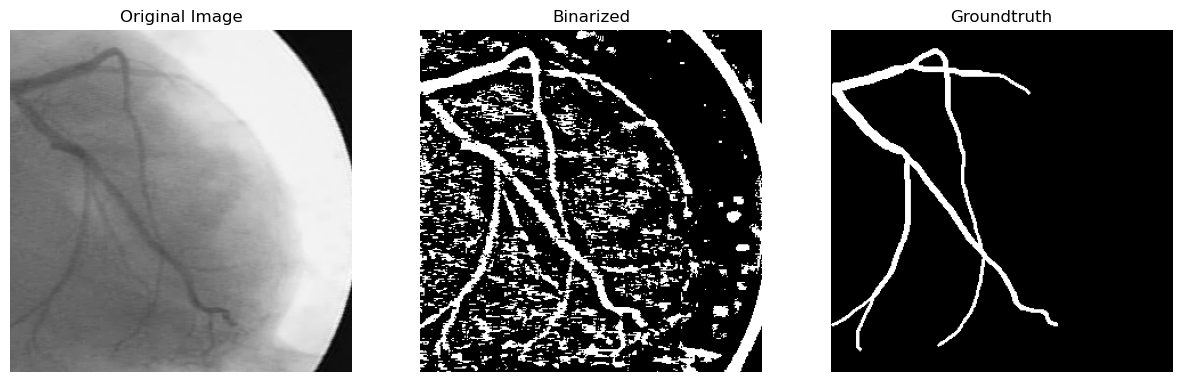

Image 19:
Accuracy: 0.7615
Recall: 0.8806
Precision: 0.1490
F1 Score: 0.2549
Specificity: 0.7557
-------------------------


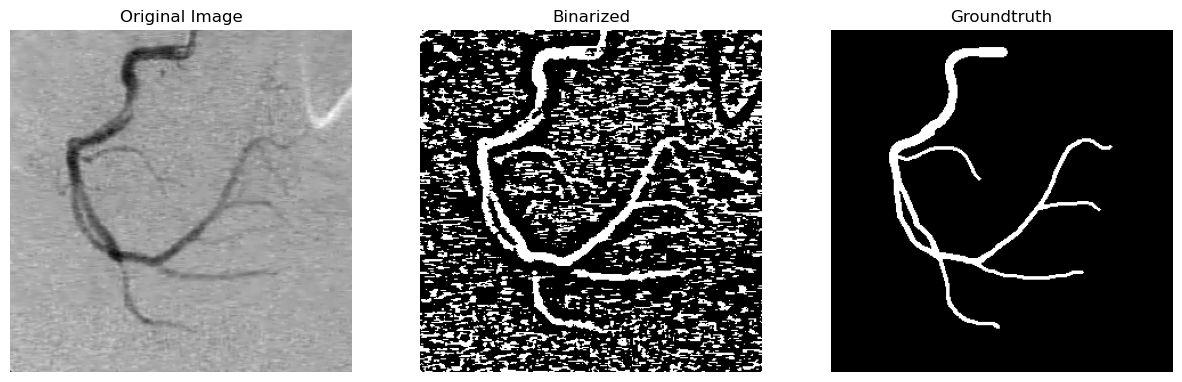

Image 20:
Accuracy: 0.8238
Recall: 0.9411
Precision: 0.2796
F1 Score: 0.4312
Specificity: 0.8148
-------------------------


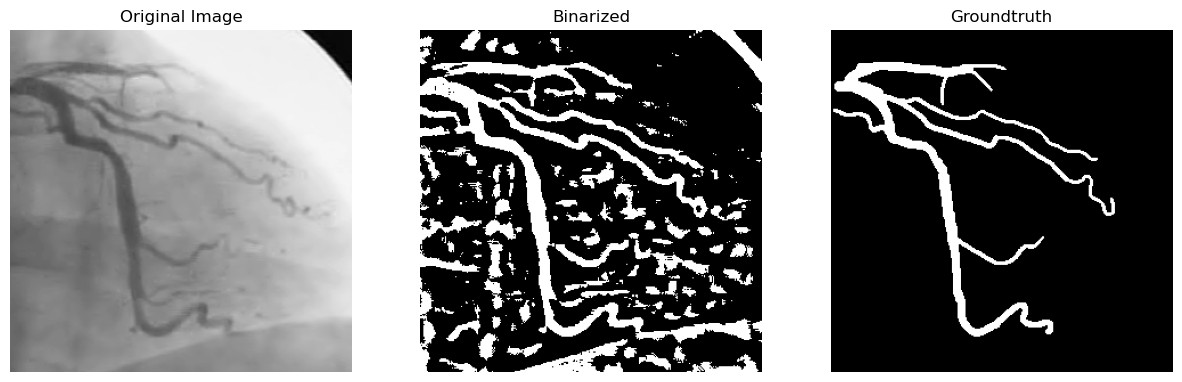

Metrics saved to vessel_segmentation_metrics.csv


In [92]:
metrics_data = []

for i in range(1, 21):
    image_path = f'data/original/{i}.pgm'
    groundtruth_path = f'data/groundtruth/{i}_gt.pgm'
    
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    groundtruth = plt.imread(groundtruth_path)
    
    I = binarize_arteries(image)

    groundtruth = (groundtruth / 255).astype(np.uint8)

    accuracy = accuracy_score(groundtruth.flatten(), I.flatten())
    recall = recall_score(groundtruth.flatten(), I.flatten())
    precision = precision_score(groundtruth.flatten(), I.flatten())
    f1 = f1_score(groundtruth.flatten(), I.flatten())
    
    tn, fp, fn, tp = confusion_matrix(groundtruth.flatten(), I.flatten()).ravel()
    specificity = tn / (tn + fp)
    
    # Store metrics for this image
    metrics_data.append({
        'Image': i,
        'Accuracy': round(accuracy, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'F1Score': round(f1, 4),
        'Specificity': round(specificity, 4)
    })
    
    print(f'Image {i}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print('-------------------------')
    
    # Mostrar las imágenes
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(I, cmap='gray')
    plt.title('Binarized')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(groundtruth, cmap='gray')
    plt.title('Groundtruth')
    plt.axis('off')
    
    plt.show()
    
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv('vessel_segmentation_metrics.csv', index=False)
print("Metrics saved to vessel_segmentation_metrics.csv")
    